## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
!unzip '/content/Datasets.zip'

Archive:  /content/Datasets.zip
   creating: Datasets/Test/
   creating: Datasets/Test/audi/
  inflating: Datasets/Test/audi/21.jpg  
  inflating: Datasets/Test/audi/22.jpg  
  inflating: Datasets/Test/audi/23.jpg  
  inflating: Datasets/Test/audi/24.jpg  
  inflating: Datasets/Test/audi/25.jpg  
  inflating: Datasets/Test/audi/26.jpg  
  inflating: Datasets/Test/audi/27.jpg  
 extracting: Datasets/Test/audi/28.jpg  
  inflating: Datasets/Test/audi/29.jpg  
   creating: Datasets/Test/lamborghini/
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamborghini/17.jpg  
  inflating: Datasets/Test/lamborghini/18.jpg  
  inflating: Datase

In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [8]:
IMAGE_SIZE = [224, 224]

train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/Test'


In [5]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [10]:
for layer in resnet.layers:
    layer.trainable = False

In [11]:
folders = glob('/content/Datasets/Train/*')

In [18]:
folders

['/content/Datasets/Train/mercedes',
 '/content/Datasets/Train/audi',
 '/content/Datasets/Train/lamborghini']

In [12]:
x = Flatten()(resnet.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=prediction)

In [15]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [16]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [22]:
test_set = test_datagen.flow_from_directory('/content/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [23]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
2/2 [==============================] - 25s 15s/step - loss: 5.3192 - accuracy: 0.4219 - val_loss: 3.4537 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 21s 14s/step - loss: 8.4136 - accuracy: 0.3125 - val_loss: 5.7999 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 20s 14s/step - loss: 7.7434 - accuracy: 0.2344 - val_loss: 9.9366 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 19s 14s/step - loss: 6.3252 - accuracy: 0.3438 - val_loss: 4.9769 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 19s 14s/step - loss: 4.7446 - accuracy: 0.3906 - val_loss: 4.1197 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 20s 14s/step - loss: 3.7499 - accuracy: 0.3594 - val_loss: 3.0414 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 19s 14s/step - loss: 3.4294 - accuracy: 0.4062 - val_loss: 2.2394 - val_accuracy: 0.5000
Epoch 8/50
2/2 [===========

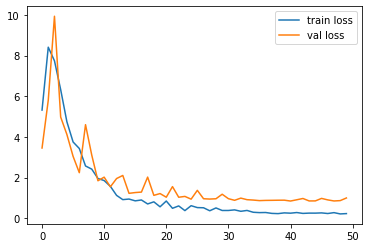

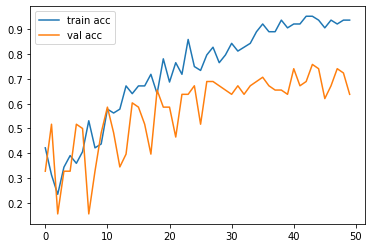

<Figure size 432x288 with 0 Axes>

In [24]:
# plotting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [26]:
y_pred = model.predict(test_set)


In [27]:
y_pred

array([[3.13520841e-02, 2.42047161e-01, 7.26600766e-01],
       [2.56043160e-03, 4.77779686e-01, 5.19659936e-01],
       [4.50046994e-02, 8.10516953e-01, 1.44478410e-01],
       [7.94426501e-02, 4.61276388e-03, 9.15944576e-01],
       [2.41217539e-02, 9.31114182e-02, 8.82766783e-01],
       [3.87228727e-01, 3.29376459e-02, 5.79833627e-01],
       [9.09424573e-03, 2.56434768e-01, 7.34470963e-01],
       [9.67340231e-01, 9.34417825e-03, 2.33156551e-02],
       [5.09210452e-02, 1.91992939e-01, 7.57086039e-01],
       [2.05067068e-01, 4.23583776e-01, 3.71349186e-01],
       [4.16787080e-02, 6.05215311e-01, 3.53105992e-01],
       [2.63726879e-02, 8.99276435e-01, 7.43509084e-02],
       [7.62591064e-02, 1.66893467e-01, 7.56847441e-01],
       [2.90663708e-02, 8.09057951e-02, 8.90027881e-01],
       [4.89916988e-02, 1.05484563e-03, 9.49953496e-01],
       [2.15347518e-05, 5.53778846e-05, 9.99923110e-01],
       [8.28097165e-02, 5.45841992e-01, 3.71348321e-01],
       [8.73412669e-01, 2.47656

In [28]:
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2,
       2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 2, 1, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2])

In [43]:
img = image.load_img('/content/Datasets/Test/lamborghini/21.jpg',target_size=(224,224))



In [44]:
x = image.img_to_array(img)
x

array([[[  2.,  53., 170.],
        [  3.,  54., 171.],
        [  4.,  53., 171.],
        ...,
        [252., 218., 209.],
        [254., 217., 209.],
        [253., 216., 208.]],

       [[  3.,  54., 171.],
        [  4.,  53., 171.],
        [  5.,  54., 172.],
        ...,
        [252., 218., 209.],
        [252., 218., 209.],
        [253., 216., 208.]],

       [[  3.,  54., 171.],
        [  4.,  53., 171.],
        [  5.,  54., 172.],
        ...,
        [252., 218., 209.],
        [252., 218., 209.],
        [253., 216., 208.]],

       ...,

       [[127., 159., 232.],
        [ 81., 115., 179.],
        [  8.,  43., 101.],
        ...,
        [175., 131., 104.],
        [165., 121.,  94.],
        [141.,  97.,  72.]],

       [[127., 159., 232.],
        [ 81., 115., 179.],
        [  8.,  43., 101.],
        ...,
        [175., 131., 104.],
        [165., 121.,  94.],
        [141.,  97.,  72.]],

       [[  5.,  35., 107.],
        [102., 134., 195.],
        [145., 1

In [45]:
x.shape

(224, 224, 3)

In [46]:
x = x/255

In [47]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [48]:
model.predict(img_data)

array([[1.9223118e-02, 4.4646201e-04, 9.8033041e-01]], dtype=float32)

In [49]:
a = np.argmax(model.predict(img_data), axis=1)

In [52]:
a == 1

array([False])